# _**IMAGE CLASSIFICATION LAB**_



# Julia Hernández y Federico Soriano

## Classification Model (apple, banana, orange and mix)

In [0]:
import keras
keras.__version__

'2.2.5'

First of all, we load our dataset from our drive:

In [0]:
import os, shutil

In [0]:
from google.colab import drive
drive.mount('/content/drive')

!pwd
#!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/DatasetFruit


In [0]:
import os, sys 
from google.colab.patches import cv2_imshow

original_dataset_dir = '/content/drive/My Drive/DatasetFruit'
#original_dataset_dir = '/content/drive/My Drive/Analisis Datos no Estructurados/Practicas Images/PracticaEntregable'

os.chdir(original_dataset_dir) 
sys.path.append(original_dataset_dir) 

# Root directory of the project 
ROOT_DIR = os.path.abspath(".") 
# Directory of images to run detection on 
IMAGE_DIR = os.path.join(ROOT_DIR) 

print(IMAGE_DIR)

/content/drive/My Drive/DatasetFruit


# EXECUTE THIS CELL IF YOU HAVE THE DIRECTORIES AND SUBDIRECTORIES (TRAIN, TEST AND VALIDATION) ALREADY CREATED. IF NOT DO IT BY EXECUTING THE NEXT CELL

In [0]:
# The directory where we will store our smaller dataset
base_dir = '/content/drive/My Drive/DatasetFruit_Final'

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'training')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Directories with our training pictures
train_apple_dir = os.path.join(train_dir, 'apple')
train_banana_dir = os.path.join(train_dir, 'banana')
train_orange_dir = os.path.join(train_dir, 'orange')
train_mixed_dir = os.path.join(train_dir, 'mixed')

# Directories with our validation pictures
validation_apple_dir = os.path.join(validation_dir, 'apple')
validation_banana_dir = os.path.join(validation_dir, 'banana')
validation_orange_dir = os.path.join(validation_dir, 'orange')
validation_mixed_dir = os.path.join(validation_dir, 'mixed')


# Directories with our test pictures
test_apple_dir = os.path.join(test_dir, 'apple')
test_banana_dir = os.path.join(test_dir, 'banana')
test_orange_dir = os.path.join(test_dir, 'orange')
test_mixed_dir = os.path.join(test_dir, 'mixed')

If we do not have our data divided, execute this cell:

In [ ]:
base_dir = '/content/drive/My Drive/DatasetFruit_Final'
os.mkdir(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'training')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with our training apple pictures
train_apple_dir = os.path.join(train_dir, 'apple')
os.mkdir(train_apple_dir)

# Directory with our training banana pictures
train_banana_dir = os.path.join(train_dir, 'banana')
os.mkdir(train_banana_dir)

# Directory with our training orange pictures
train_orange_dir = os.path.join(train_dir, 'orange')
os.mkdir(train_orange_dir)

# Directory with our training mixed pictures
train_mixed_dir = os.path.join(train_dir, 'mixed')
os.mkdir(train_mixed_dir)

# Directory with our validation apple pictures
validation_apple_dir = os.path.join(validation_dir, 'apple')
os.mkdir(validation_apple_dir)

# Directory with our validation banana pictures
validation_banana_dir = os.path.join(validation_dir, 'banana')
os.mkdir(validation_banana_dir)

# Directory with our validation orange pictures
validation_orange_dir = os.path.join(validation_dir, 'orange')
os.mkdir(validation_orange_dir)

# Directory with our validation mixed pictures
validation_mixed_dir = os.path.join(validation_dir, 'mixed')
os.mkdir(validation_mixed_dir)

# Directory with our test apple pictures
test_apple_dir = os.path.join(test_dir, 'apple')
os.mkdir(test_apple_dir)

# Directory with our test banana pictures
test_banana_dir = os.path.join(test_dir, 'banana')
os.mkdir(test_banana_dir)

# Directory with our test orange pictures
test_orange_dir = os.path.join(test_dir, 'orange')
os.mkdir(test_orange_dir)

# Directory with our test orange pictures
test_mixed_dir = os.path.join(test_dir, 'mixed')
os.mkdir(test_mixed_dir)

# Copy first 50 apple images to train_apple_dir
fnames = ['apple_{}.jpg'.format(i) for i in range(1,51)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_apple_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 25 apple images to validation_apple_dir
fnames = ['apple_{}.jpg'.format(i) for i in range(51, 75)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_apple_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 20 apple images to test_apple_dir
fnames = ['apple_{}.jpg'.format(i) for i in range(75, 96)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_apple_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 50 banana images to train_banana_dir
fnames = ['banana_{}.jpg'.format(i) for i in range(1,51)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_banana_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 25 banana images to validation_banana_dir
fnames = ['banana_{}.jpg'.format(i) for i in range(51, 75)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_banana_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 20 banaba images to test_banana_dir
fnames = ['banana_{}.jpg'.format(i) for i in range(75, 95)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_banana_dir, fname)
    shutil.copyfile(src, dst)
    
    # Copy first 50 orange images to train_orange_dir
fnames = ['orange_{}.jpg'.format(i) for i in range(1,51)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_orange_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 25 orange images to validation_orange_dir
fnames = ['orange_{}.jpg'.format(i) for i in range(51, 75)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_orange_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 10 orange images to test_orange_dir
fnames = ['orange_{}.jpg'.format(i) for i in range(75, 96)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_orange_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 12 mixed images to train_mixed_dir
fnames = ['mixed_{}.jpg'.format(i) for i in range(1,12)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_mixed_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 8 mixed images to validation_mixed_dir
fnames = ['mixed_{}.jpg'.format(i) for i in range(13, 20)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_mixed_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 5 mixed images to test_mixed_dir
fnames = ['mixed_{}.jpg'.format(i) for i in range(21, 26)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_mixed_dir, fname)
    shutil.copyfile(src, dst)

We have created different directories for train, test and validation and subdirectories for apple, bananas, oranges and mix.

In [0]:
print('total training apple images:', len(os.listdir(train_apple_dir)))
print('total training banana images:', len(os.listdir(train_banana_dir)))
print('total training orange images:', len(os.listdir(train_orange_dir)))
print('total training mixed images:', len(os.listdir(train_mixed_dir)))
print('total validation apple images:', len(os.listdir(validation_apple_dir)))
print('total validation banana images:', len(os.listdir(validation_banana_dir)))
print('total validation orange images:', len(os.listdir(validation_orange_dir)))
print('total validation mixed images:', len(os.listdir(validation_mixed_dir)))
print('total test apple images:', len(os.listdir(test_apple_dir)))
print('total test banana images:', len(os.listdir(test_banana_dir)))
print('total test orange images:', len(os.listdir(test_orange_dir)))
print('total test mixed images:', len(os.listdir(test_mixed_dir)))

total training apple images: 50
total training banana images: 50
total training orange images: 50
total training mixed images: 11
total validation apple images: 24
total validation banana images: 24
total validation orange images: 24
total validation mixed images: 7
total test apple images: 21
total test banana images: 20
total test orange images: 21
total test mixed images: 5


# Data Preprocessing

Data should be formatted into appropriately pre-processed floating point tensors before being fed into our network. Currently, our data sits on a drive as JPEG files, so the steps for getting it into our network are roughly:

Read the picture files.
Decode the JPEG content to RBG grids of pixels.
Convert these into floating point tensors.
Rescale the pixel values (between 0 and 255) to the [0, 1] interval (as you know, neural networks prefer to deal with small input values).

Keras has a module with image processing helper tools, located at keras.preprocessing.image. In particular, it contains the class ImageDataGenerator which allows to quickly set up Python generators that can automatically turn image files on disk into batches of pre-processed tensors. This is what we will use here.

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

Found 161 images belonging to 4 classes.
Found 79 images belonging to 4 classes.


# First Model (too complex for our small dataset)

We are going to create a first model with a lot of convolution and pooling layers. This way we can see how poorly our model will behave due to the small sample size.

## Building our Network

We've already built a small convnet for MNIST in the previous example, so you should be familiar with them. We will reuse the same general structure: our convnet will be a stack of alternated Conv2D (with relu activation) and MaxPooling2D layers.

However, since we are dealing with bigger images and a more complex problem, we will make our network accordingly larger: it will have one more Conv2D + MaxPooling2D stage. This serves both to augment the capacity of the network, and to further reduce the size of the feature maps, so that they aren't overly large when we reach the Flatten layer. Here, since we start from inputs of size 150x150 (a somewhat arbitrary choice), we end up with feature maps of size 7x7 right before the Flatten layer.

Note that the depth of the feature maps is progressively increasing in the network (from 32 to 128), while the size of the feature maps is decreasing (from 148x148 to 7x7). This is a pattern that you will see in almost all convnets.

Since we are attacking a categorical classification problem, we are ending the network with a single unit (a Dense layer of size 4) and a softmax activation. This unit will encode the probability that the network is looking at one class or the other.

In [0]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

In [0]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 15, 15, 128)      

For our compilation step, we'll go with the RMSprop optimizer. Since we ended our network with a softmax unit, we will use categorical crossentropy as our loss.

In [0]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [0]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=10,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/50
 1/10 [==>...........................] - ETA: 28s - loss: 1.3441 - acc: 0.4500

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


10/10 [==============================] - 40s 4s/step - loss: 1.3416 - acc: 0.4139 - val_loss: 1.2910 - val_acc: 0.5445
Epoch 2/50
10/10 [==============================] - 36s 4s/step - loss: 1.1183 - acc: 0.6323 - val_loss: 1.0939 - val_acc: 0.7345
Epoch 3/50
10/10 [==============================] - 37s 4s/step - loss: 0.9965 - acc: 0.5956 - val_loss: 2.0333 - val_acc: 0.3047
Epoch 4/50
10/10 [==============================] - 38s 4s/step - loss: 0.9114 - acc: 0.7450 - val_loss: 0.8995 - val_acc: 0.7335
Epoch 5/50
10/10 [==============================] - 36s 4s/step - loss: 0.7184 - acc: 0.7396 - val_loss: 1.1119 - val_acc: 0.6083
Epoch 6/50
10/10 [==============================] - 37s 4s/step - loss: 0.6772 - acc: 0.8183 - val_loss: 1.2544 - val_acc: 0.4580
Epoch 7/50
10/10 [==============================] - 38s 4s/step - loss: 0.5905 - acc: 0.7800 - val_loss: 0.6984 - val_acc: 0.7217
Epoch 8/50
10/10 [==============================] - 36s 4s/step - loss: 0.5189 - acc: 0.8162 - val_lo

It is good practice to always save your models after training:

In [0]:
model.save('fruits_small.h5')


Let's plot the loss and accuracy of the model over the training and validation data during training:

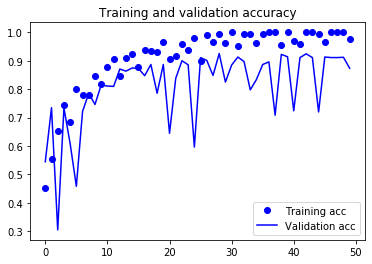

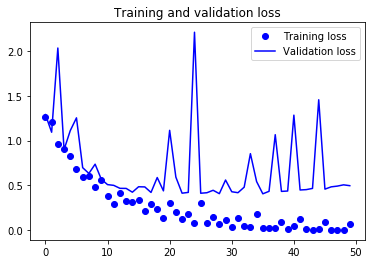

In [0]:

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Just how we predicted, our model is too complex for our small dataset and we are not able to get a good accuracy or generalice. The model memorizes the data getting a huge accuracy in training, but for validation, the more epochs, the more unstable the prediction gets.

## Second Model (Much more simplified)

In this case, we only add one convolutional layer and one pooling layer. We made our model much more simple so it can deal better with the small sample.

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(4, activation='softmax'))

In [0]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 175232)            0         
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 700932    
Total params: 701,828
Trainable params: 701,828
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [0]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=10,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/50


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


10/10 [==============================] - 35s 3s/step - loss: 1.9751 - acc: 0.3882 - val_loss: 1.2429 - val_acc: 0.5806
Epoch 2/50
10/10 [==============================] - 34s 3s/step - loss: 1.3111 - acc: 0.5402 - val_loss: 1.1358 - val_acc: 0.5309
Epoch 3/50
10/10 [==============================] - 34s 3s/step - loss: 1.1584 - acc: 0.5645 - val_loss: 1.0580 - val_acc: 0.5195
Epoch 4/50
10/10 [==============================] - 32s 3s/step - loss: 1.1501 - acc: 0.5961 - val_loss: 1.0588 - val_acc: 0.6333
Epoch 5/50
10/10 [==============================] - 34s 3s/step - loss: 1.5451 - acc: 0.3177 - val_loss: 1.1636 - val_acc: 0.3814
Epoch 6/50
10/10 [==============================] - 34s 3s/step - loss: 1.0128 - acc: 0.6087 - val_loss: 0.9285 - val_acc: 0.7239
Epoch 7/50
10/10 [==============================] - 32s 3s/step - loss: 0.9796 - acc: 0.5894 - val_loss: 0.8271 - val_acc: 0.7824
Epoch 8/50
10/10 [==============================] - 35s 4s/step - loss: 0.9931 - acc: 0.6056 - val_lo

In [0]:
model.save('fruits_small_simplified.h5')

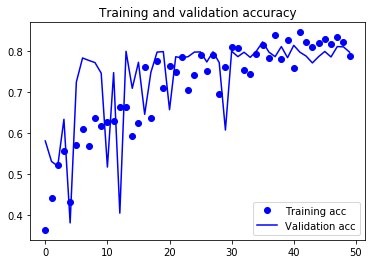

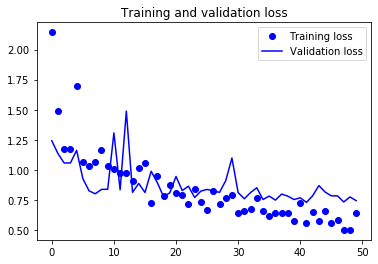

In [0]:

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

As we can see, our new model generalizes much better and our accuracy is higher and more stable for validation and the over-fitting (although still present) is much smaller. This is explained because a simple model works better with a small dataset. 

From this model we are going to use Data Augmentation to increase our train set and get even better results.

### Data Augmentation Example

Overfitting is caused by having too few samples to learn from, rendering us unable to train a model able to generalize to new data. Given infinite data, our model would be exposed to every possible aspect of the data distribution at hand: we would never overfit. Data augmentation takes the approach of generating more training data from existing training samples, by "augmenting" the samples via a number of random transformations that yield believable-looking images. The goal is that at training time, our model would never see the exact same picture twice. This helps the model get exposed to more aspects of the data and generalize better.

In Keras, this can be done by configuring a number of random transformations to be performed on the images read by our ImageDataGenerator instance. Let's get started with an example:

In [0]:

datagen = ImageDataGenerator(
      rotation_range=180,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

These are just a few of the options available (for more, see the Keras documentation). Let's quickly go over what we just wrote:

rotation_range is a value in degrees (0-180), a range within which to randomly rotate pictures.
width_shift and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
shear_range is for randomly applying shearing transformations.
zoom_range is for randomly zooming inside pictures.
horizontal_flip is for randomly flipping half of the images horizontally -- relevant when there are no assumptions of horizontal asymmetry (e.g. real-world pictures).
fill_mode is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.
Let's take a look at our augmented images:
      

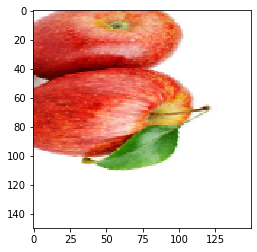

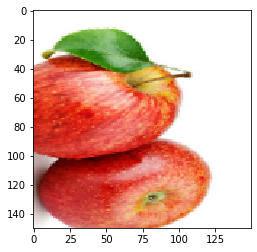

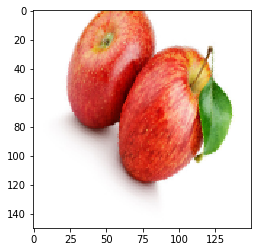

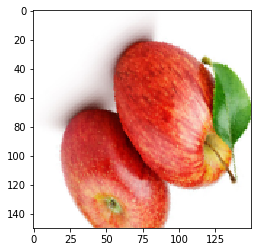

In [0]:
# This is module with image preprocessing utilities
from keras.preprocessing import image

fnames = [os.path.join(train_apple_dir, fname) for fname in os.listdir(train_apple_dir)]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

# We use our Second Model (simple one) adding to it Data Augmentation

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(4, activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Let's train our network using data augmentation and dropout:


In [0]:
# DATA AUGMENTATION
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=90,
    width_shift_range=0.5,
    height_shift_range=0.5,
    shear_range=0.5,
    zoom_range=0.5,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# DATA PREPARATION
train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=1,
    class_mode="categorical", 
    shuffle=False)

history = model.fit_generator(
      train_generator,
      steps_per_epoch=10,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=50)

Found 161 images belonging to 4 classes.
Found 79 images belonging to 4 classes.
Found 67 images belonging to 4 classes.
Epoch 1/50


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


10/10 [==============================] - 36s 4s/step - loss: 2.1168 - acc: 0.3787 - val_loss: 1.2531 - val_acc: 0.3803
Epoch 2/50
10/10 [==============================] - 34s 3s/step - loss: 1.6811 - acc: 0.3066 - val_loss: 1.1077 - val_acc: 0.6224
Epoch 3/50
10/10 [==============================] - 34s 3s/step - loss: 1.5586 - acc: 0.5402 - val_loss: 1.0551 - val_acc: 0.5545
Epoch 4/50
10/10 [==============================] - 32s 3s/step - loss: 1.1642 - acc: 0.5657 - val_loss: 1.1611 - val_acc: 0.5452
Epoch 5/50
10/10 [==============================] - 35s 4s/step - loss: 1.6420 - acc: 0.4291 - val_loss: 0.9516 - val_acc: 0.6240
Epoch 6/50
10/10 [==============================] - 34s 3s/step - loss: 1.2897 - acc: 0.5096 - val_loss: 0.9194 - val_acc: 0.7468
Epoch 7/50
10/10 [==============================] - 33s 3s/step - loss: 1.1695 - acc: 0.4670 - val_loss: 1.1014 - val_acc: 0.5452
Epoch 8/50
10/10 [==============================] - 34s 3s/step - loss: 1.2830 - acc: 0.5132 - val_lo

In [0]:
model.save('fruits_small_simplified_withaugmentation.h5')

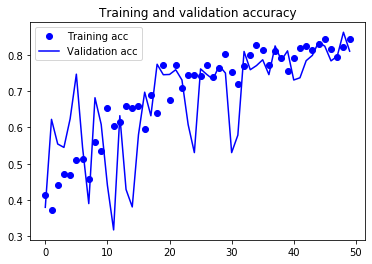

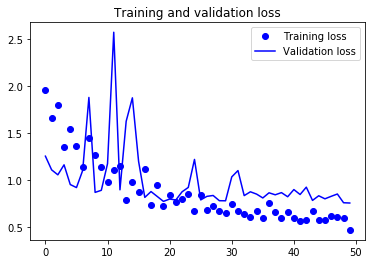

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Thanks to data augmentation and dropout, we are no longer overfitting: the training curves are rather closely tracking the validation curves because the range of the graphs are really small. We are now able to reach an accuracy of 86%, compared to the 81% of the model without Data Augmentation. We note that we could also run some more epochs and increase the accuracy, as the accuracy curve ploted keeps going up in the last epochs.

By leveraging regularization techniques even further and by tuning the network's parameters (such as the number of filters per convolution layer, or the number of layers in the network), we may be able to get an even better accuracy. However, it would prove very difficult to go any higher just by training our own convnet from scratch, simply because we have so little data to work with. 

## For the Test Set...

We will plot different images from out test set to check how they are qualified into the different categories. As we can see below our model does really good and is pretty accurate with the test set.

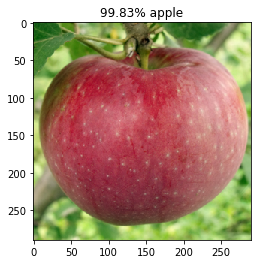

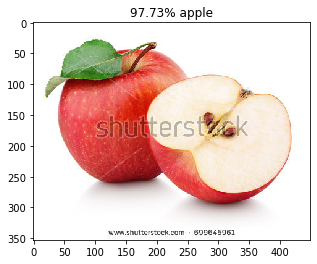

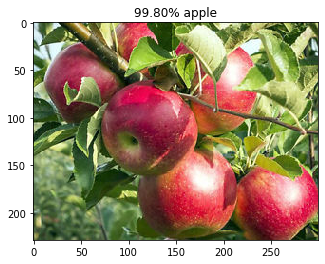

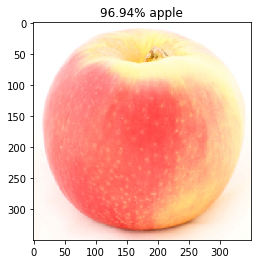

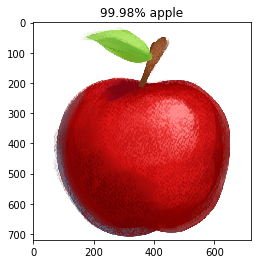

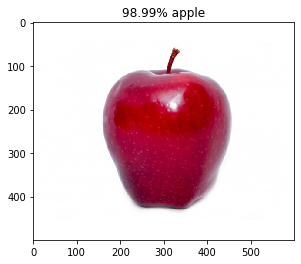

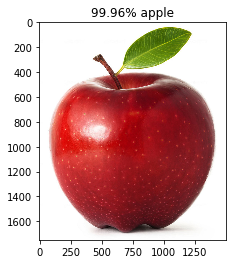

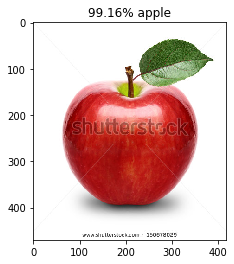

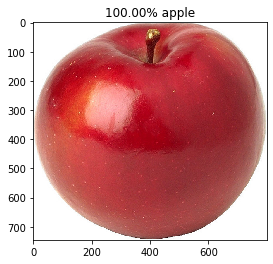

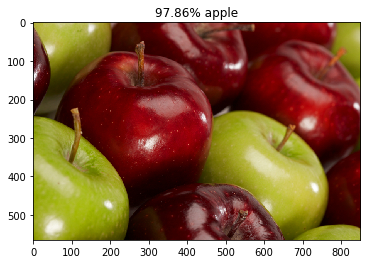

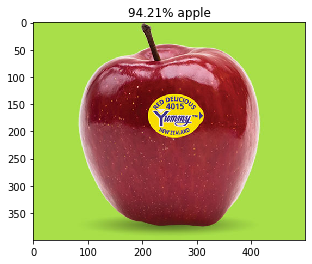

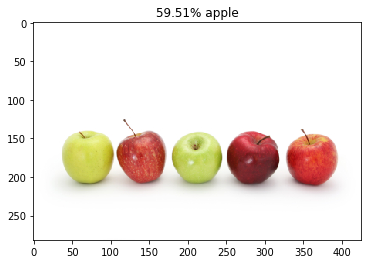

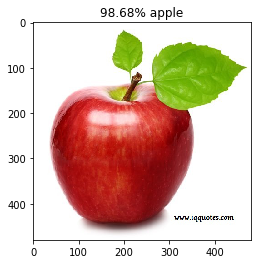

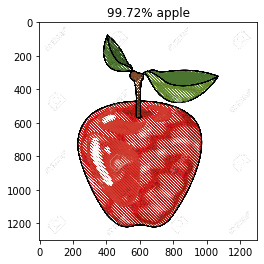

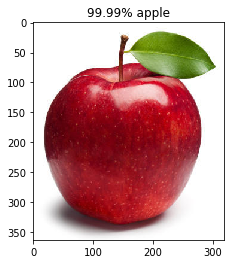

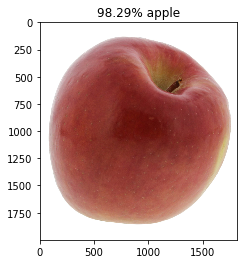

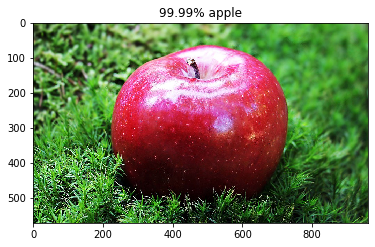

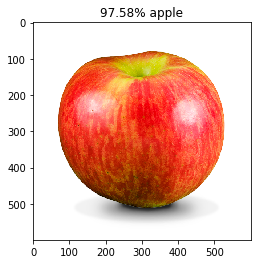

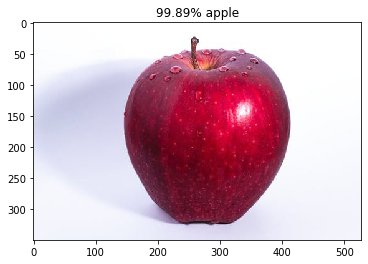

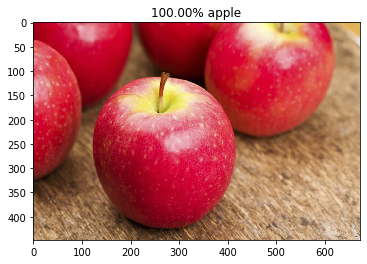

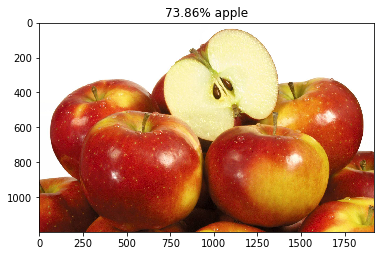

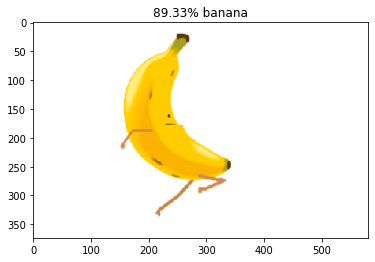

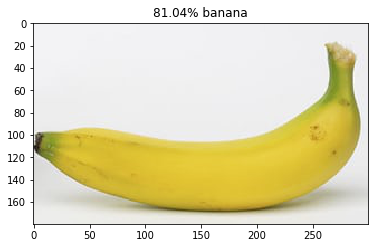

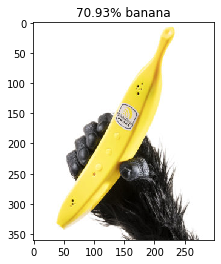

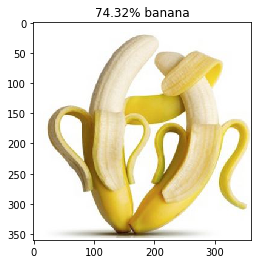

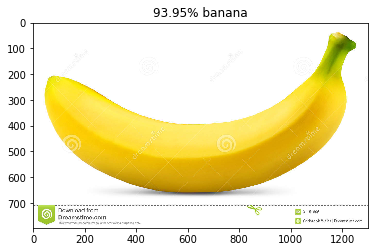

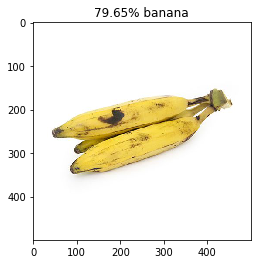

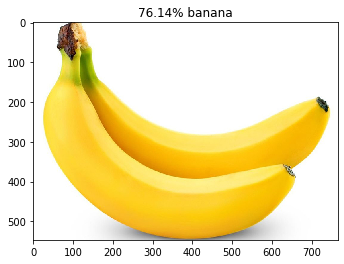

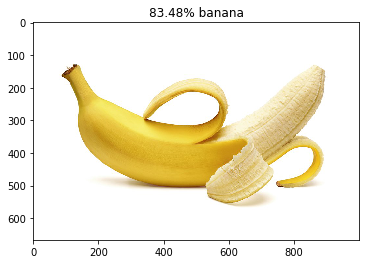

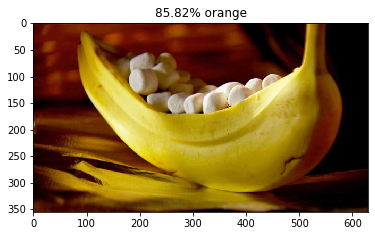

In [0]:
import matplotlib.image as mpimg
import numpy as np
# Testing
probabilities = model.predict_generator(test_generator, 30)

#print(probabilities)
for index, array in enumerate(probabilities):
    image_path = test_dir + "/" +test_generator.filenames[index]
    img = mpimg.imread(image_path)
    plt.imshow(img)
    ind = np.argmax(array)
    if ind == 0:
        plt.title("%.2f" % (array[ind]*100) + "% apple")
    elif ind == 1:
        plt.title("%.2f" % (array[ind]*100) + "% banana")
    elif ind == 2:
        plt.title("%.2f" % (array[ind]*100) + "% mix")
    else:
        plt.title("%.2f" % (array[ind]*100) + "% orange")

    plt.show()